# Assignment 7: Adam

For this assignment, I built on my previous code to add adaptive learning in the vein of RMS prop, as well as bias correction.

All cost graphs are drawn with the first iteration values ommitted, and all error graphs are drawn with the first two iterations ommitted. The reason for this is that, in general, the first two iterations are spent with very steep drops in cost or error rate. By ommitting the very early iterations, we can more closely inspect the shape of our cost and error graphs.

All tests are run using the first 12000 images and labels from MNIST training set, and unless otherwise specified, are run with a learning rate of 1.0, mini-batch size of 600, and 100 iterations.

## Adam w/ Full dataset

In [1]:
import assignment6 as a6
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import time
import neural_utils as nu

In [2]:
%load_ext autoreload
%autoreload 2
from adam_net import NeuralNet
import neural_utils as nu

In [3]:
mndata = MNIST('./mnist/')

In [4]:
origImages, origLabels = mndata.load_training()
origTImages, origTLabels = mndata.load_testing()

In [5]:
images = a6.normalize_images(origImages[:12000])
labels = a6.normalize_labels(origLabels[:12000])
tImages = a6.normalize_images(origTImages)
tLabels = a6.normalize_labels(origTLabels)

In [95]:
alpha = .001
b1 = 0.9
b2 = 0.999
iters = 100
batchSize = 512
momentum = 0

In [19]:
net = NeuralNet.build([784, 20, 10, 1], "relu")
mImages = a6.normalize_images(origImages)
mLabels = a6.normalize_labels(origLabels)
costs, training, test = net.train(mImages, mLabels, iters, alpha, silent=False, verbose=True, 
                                  errors=True, tX=tImages, tY = tLabels, batchSize=batchSize, printGap=1,
                                  b1=b1, b2=b2)

Iteration 0 of 100
Cost is 0.6923566567519828
Training correct is: 0.10855
Test correct is: 0.6061
Iteration 1 of 100
Cost is 0.22518270372440918
Training correct is: 0.90965
Test correct is: 0.9108
Iteration 2 of 100
Cost is 0.1020089222956739
Training correct is: 0.9664166666666667
Test correct is: 0.9697
Iteration 3 of 100
Cost is 0.08824883844085975
Training correct is: 0.9717
Test correct is: 0.9787
Iteration 4 of 100
Cost is 0.059754210532304904
Training correct is: 0.9810666666666666
Test correct is: 0.982
Iteration 5 of 100
Cost is 0.048681330296240326
Training correct is: 0.9849166666666667
Test correct is: 0.9839
Iteration 6 of 100
Cost is 0.04197148920594158
Training correct is: 0.9869
Test correct is: 0.9848
Iteration 7 of 100
Cost is 0.0353060742298859
Training correct is: 0.989
Test correct is: 0.9868
Iteration 8 of 100
Cost is 0.02978265934018821
Training correct is: 0.9907
Test correct is: 0.9881
Iteration 9 of 100
Cost is 0.030653584977509748
Training correct is: 0.990

/home/jasperlu/deep_learning/adam_net.py:72: RuntimeWarning: divide by zero encountered in log
  right = np.vectorize(lambda x: np.log(1-x))
/home/jasperlu/deep_learning/adam_net.py:73: RuntimeWarning: invalid value encountered in multiply
  C = (-1./m) * (np.multiply(Y, left(a)) + np.multiply(1-Y, right(a))).dot(np.ones((m,1)))


Iteration 41 of 100
Cost is nan
Training correct is: 0.9954833333333334
Test correct is: 0.9931
Iteration 42 of 100
Cost is 0.004587683088744638
Training correct is: 0.99865
Test correct is: 0.9933
Iteration 43 of 100
Cost is nan
Training correct is: 0.9982166666666666
Test correct is: 0.9938
Iteration 44 of 100
Cost is 0.005433207115919953
Training correct is: 0.9982166666666666
Test correct is: 0.9928
Iteration 45 of 100
Cost is nan
Training correct is: 0.9984666666666666
Test correct is: 0.9938
Iteration 46 of 100
Cost is nan
Training correct is: 0.99825
Test correct is: 0.9943
Iteration 47 of 100
Cost is nan
Training correct is: 0.99775
Test correct is: 0.9938
Iteration 48 of 100
Cost is nan
Training correct is: 0.99805
Test correct is: 0.994
Iteration 49 of 100
Cost is nan
Training correct is: 0.9987833333333334
Test correct is: 0.9943
Iteration 50 of 100
Cost is nan
Training correct is: 0.9994166666666666
Test correct is: 0.9941
Iteration 51 of 100
Cost is nan
Training correct is

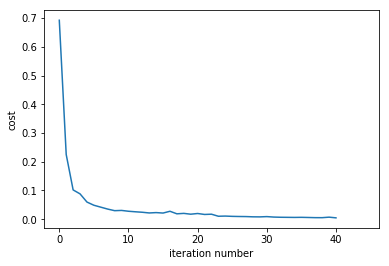

In [20]:
plt.plot(costs)
plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()
plt.close()

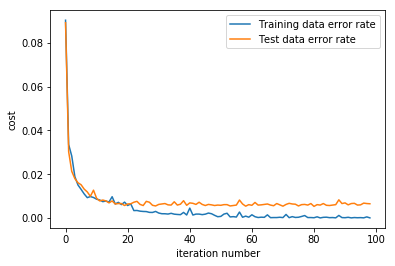

In [21]:
trainPlot = plt.plot([1 - x for x in training[2:]])[0]
testPlot = plt.plot([1 -x for x in test[2:]])[0]
plt.legend([trainPlot, testPlot],["Training data error rate", "Test data error rate"])
plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()
plt.close()

In [32]:
nu.test_correct(net, tImages, tLabels, True)

Test run on 784 instances.
Correct prediction on 9935.0 instances.
Correct rate is 0.9935
False negatives: 48
False positives: 17


0.9935

I would like to point out that around iteration 40, I start to get NaN for my cost function values. The reason for this is that we start to classify an instance either purely 1 or purely 0, and this causes our cost function to include log(1 - 1) = log(0), which is NaN.

## Adam with full dataset and regularization

In [29]:
plainNet = NeuralNet.build([784, 20, 10, 1], "relu")
mImages = a6.normalize_images(origImages)
mLabels = a6.normalize_labels(origLabels)
costs, training, test = plainNet.train(mImages, mLabels, iters, alpha, silent=False, verbose=True, 
                                  errors=True, tX=tImages, tY = tLabels, batchSize=batchSize, printGap=1,
                                  b1=b1, b2=b2, regParam=.5)

Iteration 0 of 100
Cost is 0.693143695847017
Training correct is: 0.09043333333333334
Test correct is: 0.7343
Iteration 1 of 100
Cost is 0.1507856602179583
Training correct is: 0.9424
Test correct is: 0.9545
Iteration 2 of 100
Cost is 0.08089068823203924
Training correct is: 0.97485
Test correct is: 0.9771
Iteration 3 of 100
Cost is 0.06355669176500289
Training correct is: 0.9806166666666667
Test correct is: 0.9809
Iteration 4 of 100
Cost is 0.05355322194547827
Training correct is: 0.9844833333333334
Test correct is: 0.9845
Iteration 5 of 100
Cost is 0.05040374417415634
Training correct is: 0.9842
Test correct is: 0.9844
Iteration 6 of 100
Cost is 0.041323057998980034
Training correct is: 0.9879666666666667
Test correct is: 0.9878
Iteration 7 of 100
Cost is 0.03756536289831992
Training correct is: 0.9892333333333333
Test correct is: 0.9886
Iteration 8 of 100
Cost is 0.0341212046479335
Training correct is: 0.9900833333333333
Test correct is: 0.989
Iteration 9 of 100
Cost is 0.0312292753

Training correct is: 0.9977666666666667
Test correct is: 0.9929
Iteration 76 of 100
Cost is 0.008492856730560761
Training correct is: 0.9977
Test correct is: 0.9935
Iteration 77 of 100
Cost is 0.008946118629416388
Training correct is: 0.9974166666666666
Test correct is: 0.9935
Iteration 78 of 100
Cost is 0.008617889357552222
Training correct is: 0.9978
Test correct is: 0.992
Iteration 79 of 100
Cost is 0.008670318051042783
Training correct is: 0.9976166666666667
Test correct is: 0.9934
Iteration 80 of 100
Cost is 0.008604357068493518
Training correct is: 0.99775
Test correct is: 0.9936
Iteration 81 of 100
Cost is 0.009984705170744472
Training correct is: 0.99755
Test correct is: 0.9918
Iteration 82 of 100
Cost is 0.008211314065491627
Training correct is: 0.9980166666666667
Test correct is: 0.9932
Iteration 83 of 100
Cost is 0.008938916422388952
Training correct is: 0.9975
Test correct is: 0.993
Iteration 84 of 100
Cost is 0.00836802362563408
Training correct is: 0.9980333333333333
Test

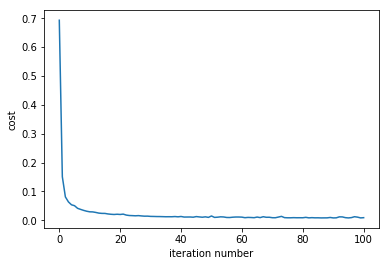

In [30]:
plt.plot(costs)
plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()
plt.close()

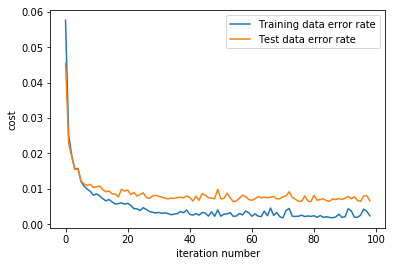

In [31]:
trainPlot = plt.plot([1 - x for x in training[2:]])[0]
testPlot = plt.plot([1 -x for x in test[2:]])[0]
plt.legend([trainPlot, testPlot],["Training data error rate", "Test data error rate"])
plt.xlabel("iteration number")
plt.ylabel("cost")
plt.show()
plt.close()

In [33]:
nu.test_correct(plainNet, tImages, tLabels, True)

Test run on 784 instances.
Correct prediction on 9934.0 instances.
Correct rate is 0.9934
False negatives: 51
False positives: 15


0.9934

I wanted to add regularization to see if it had any noticeable effect. We do end up with less bias, at pretty much the same end test performance.

## Varying b1

In [41]:
alpha = .001
iters = 100
batchSize = 512

In [42]:
momentums = [.99, .9, .75,.5,.25]
costPlots = []
trainPlots = []
testPlots = []
networks = []
for momentum in momentums:
    print("MOMENTUM CONSTANT", momentum)
    net = NeuralNet.build([784, 20, 10, 1], "relu")
    costs, training, test = net.train(images, labels, iters, alpha, silent=False, verbose=True, 
                                      errors=True, tX=tImages, tY = tLabels, batchSize=batchSize,
                                      b1=momentum, b2=b2, printGap=10)
    costPlots.append(costs)
    trainPlots.append(training)
    testPlots.append(test)
    networks.append(net)
    

MOMENTUM CONSTANT 0.99
Iteration 0 of 100
Cost is 0.6775463207713559
Training correct is: 0.8469166666666667
Test correct is: 0.8463
Iteration 10 of 100
Cost is 0.17910041447597616
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 20 of 100
Cost is 0.11915054291562173
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 30 of 100
Cost is 0.09898775058232302
Training correct is: 0.9704166666666667
Test correct is: 0.976
Iteration 40 of 100
Cost is 0.08381740522900745
Training correct is: 0.98225
Test correct is: 0.9793
Iteration 50 of 100
Cost is 0.06971304627841403
Training correct is: 0.9881666666666666
Test correct is: 0.9817
Iteration 60 of 100
Cost is 0.05753714136605593
Training correct is: 0.9919166666666667
Test correct is: 0.9836
Iteration 70 of 100
Cost is 0.040274602635901616
Training correct is: 0.9935833333333334
Test correct is: 0.9842
Iteration 80 of 100
Cost is 0.026741675791165494
Training correct is: 0.995
Test correct is: 0

In [43]:
for momentum, network in zip(momentums, networks):
    print("For network trained with momentum coefficient", momentum)
    nu.test_correct(network, tImages, tLabels, True)
    print("-----")

For network trained with momentum coefficient 0.99
Test run on 784 instances.
Correct prediction on 9845.0 instances.
Correct rate is 0.9845
False negatives: 111
False positives: 44
-----
For network trained with momentum coefficient 0.9
Test run on 784 instances.
Correct prediction on 9874.0 instances.
Correct rate is 0.9874
False negatives: 91
False positives: 35
-----
For network trained with momentum coefficient 0.75
Test run on 784 instances.
Correct prediction on 9868.0 instances.
Correct rate is 0.9868
False negatives: 90
False positives: 42
-----
For network trained with momentum coefficient 0.5
Test run on 784 instances.
Correct prediction on 9845.0 instances.
Correct rate is 0.9845
False negatives: 102
False positives: 53
-----
For network trained with momentum coefficient 0.25
Test run on 784 instances.
Correct prediction on 9855.0 instances.
Correct rate is 0.9855
False negatives: 99
False positives: 46
-----


In [44]:
trainPlots = [[1 - x for x in plot] for plot in trainPlots]
testPlots = [[1 - x for x in plot] for plot in testPlots]

First two iterations omitted becaues of lack of real information - they were steep drops and made the other lines hard to see.

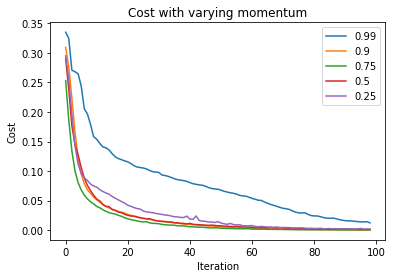

In [51]:
plots = [plt.plot(x[2:])[0] for x in costPlots]
plt.legend(plots, [str(x) for x in momentums])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost with varying momentum")
plt.show()
plt.close()

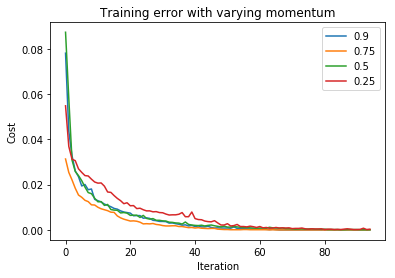

In [54]:
plots = [plt.plot(x[6:])[0] for x in trainPlots[1:]]
plt.legend(plots, [str(x) for x in momentums[1:]])
plt.title("Training error with varying momentum")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()
plt.close()

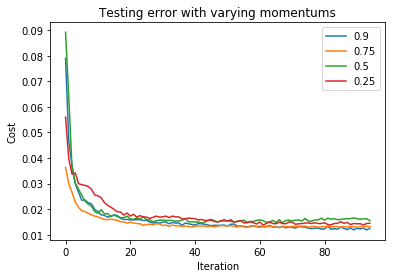

In [55]:
plots = [plt.plot(x[6:])[0] for x in testPlots[1:]]
plt.legend(plots, [str(x) for x in momentums[1:]])
plt.title("Testing error with varying momentums")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()
plt.close()

Like we could have expected, smaller choices of b1 perform worse than higher choices. This is because smaller choices of b1 means our momentum decays more rapidly. Because of that decay, our gradient descent does not "pick up speed" as well, and so does not have the minima and saddlepoint-busting properties that momentum is supposed to give us. I find it interesting that the "recommended" choice of b1 performs better than any other choice of b1 I try here.

## Varying b2

In [113]:
bs = [.999, .99, .9,.75,.5]
costPlots = []
trainPlots = []
testPlots = []
networks = []
for b in bs:
    print("b2 CONSTANT", b)
    net = NeuralNet.build([784, 20, 10, 1], "relu")
    costs, training, test = net.train(images, labels, iters, alpha, silent=False, verbose=True, 
                                      errors=True, tX=tImages, tY = tLabels, batchSize=batchSize,
                                      b1=b1, b2=b, printGap=10)
    costPlots.append(costs)
    trainPlots.append(training)
    testPlots.append(test)
    networks.append(net)

b2 CONSTANT 0.999
Iteration 0 of 100
Cost is 0.6917742753858845
Training correct is: 0.5871666666666666
Test correct is: 0.0892
Iteration 10 of 100
Cost is 0.0682827132773416
Training correct is: 0.9778333333333333
Test correct is: 0.9739
Iteration 20 of 100
Cost is 0.03474429731871985
Training correct is: 0.9890833333333333
Test correct is: 0.9805
Iteration 30 of 100
Cost is 0.019805697708203854
Training correct is: 0.9943333333333333
Test correct is: 0.9836
Iteration 40 of 100
Cost is 0.010877228926085194
Training correct is: 0.9973333333333333
Test correct is: 0.9845
Iteration 50 of 100
Cost is 0.0073951018059300105
Training correct is: 0.99825
Test correct is: 0.9848
Iteration 60 of 100
Cost is 0.004332097696988605
Training correct is: 0.9991666666666666
Test correct is: 0.9856
Iteration 70 of 100
Cost is 0.002321008461187111
Training correct is: 0.9995833333333334
Test correct is: 0.9855
Iteration 80 of 100
Cost is 0.0015262699309769622
Training correct is: 0.99975
Test correct is

/home/jasperlu/deep_learning/adam_net.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))
/home/jasperlu/deep_learning/adam_net.py:71: RuntimeWarning: divide by zero encountered in log
  left = np.vectorize(lambda x: np.log(x))
/home/jasperlu/deep_learning/adam_net.py:73: RuntimeWarning: invalid value encountered in multiply
  C = (-1./m) * (np.multiply(Y, left(a)) + np.multiply(1-Y, right(a))).dot(np.ones((m,1)))


Iteration 10 of 100
Cost is nan
Training correct is: 0.9401666666666667
Test correct is: 0.9363
Iteration 20 of 100
Cost is nan
Training correct is: 0.8839166666666667
Test correct is: 0.8812


/home/jasperlu/deep_learning/adam_net.py:72: RuntimeWarning: divide by zero encountered in log
  right = np.vectorize(lambda x: np.log(1-x))


Iteration 30 of 100
Cost is nan
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 40 of 100
Cost is nan
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 50 of 100
Cost is nan
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 60 of 100
Cost is nan
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 70 of 100
Cost is 0.40297985473326176
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 80 of 100
Cost is 0.36422532027400906
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 90 of 100
Cost is 0.33559229368344534
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 100 of 100
Cost is 0.31569471599221394
Training correct is: 0.9126666666666666
Test correct is: 0.9108


In [114]:
for momentum, network in zip(bs, networks):
    print("For network trained with b2 coefficient", momentum)
    nu.test_correct(network, tImages, tLabels, True)
    print("-----")

For network trained with b2 coefficient 0.999
Test run on 784 instances.
Correct prediction on 9871.0 instances.
Correct rate is 0.9871
False negatives: 84
False positives: 45
-----
For network trained with b2 coefficient 0.99
Test run on 784 instances.
Correct prediction on 9887.0 instances.
Correct rate is 0.9887
False negatives: 93
False positives: 20
-----
For network trained with b2 coefficient 0.9
Test run on 784 instances.
Correct prediction on 9865.0 instances.
Correct rate is 0.9865
False negatives: 117
False positives: 18
-----
For network trained with b2 coefficient 0.75
Test run on 784 instances.
Correct prediction on 9834.0 instances.
Correct rate is 0.9834
False negatives: 148
False positives: 18
-----
For network trained with b2 coefficient 0.5
Test run on 784 instances.
Correct prediction on 9108.0 instances.
Correct rate is 0.9108
False negatives: 892
False positives: 0
-----


In [115]:
trainPlots = [[1 - x for x in plot] for plot in trainPlots]
testPlots = [[1 - x for x in plot] for plot in testPlots]

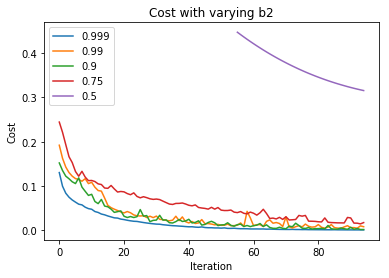

In [116]:
plots = [plt.plot(x[6:])[0] for x in costPlots]
plt.legend(plots, [str(x) for x in bs])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost with varying b2")
plt.show()
plt.close()

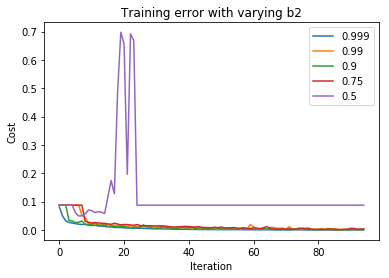

In [117]:
plots = [plt.plot(x[6:])[0] for x in trainPlots]
plt.legend(plots, [str(x) for x in bs])
plt.title("Training error with varying b2")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()
plt.close()

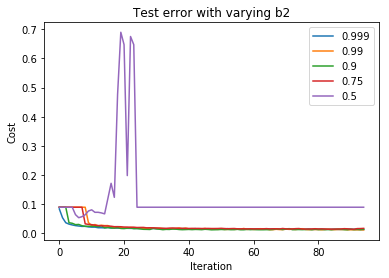

In [118]:
plots = [plt.plot(x[6:])[0] for x in testPlots]
plt.legend(plots, [str(x) for x in bs])
plt.title("Test error with varying b2")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()
plt.close()

Note: For b2 = 0.5, our network pretty much "dies" right away for that choice of b2. This could be because we blow up our initial steps too high with a choice of b2 = 0.5.

Like we could have expected, smaller choices of b2 perform worse than higher choices. This is probably because smaller choices of b2 keep too much history in our adaptive learning rate -- a large step a few iterations ago will continue to punish potential large steps in later iterations. Because of that slow decay, we do not end up catching as many steps which might have brought us out of potential local minima, etc. I find it interesting that, just like with b1, the "recommended" choice of b2 performs better than any other choice of b2 I try here. With this, I start to suspect that Adam really does not need much hyperparameter tuning compared to what we've worked with in the past.

## Varying alpha

In [69]:
alphas = [.001, .01, .1,1]
costPlots = []
trainPlots = []
testPlots = []
networks = []
for alpha in alphas:
    print("Alpha", alpha)
    net = NeuralNet.build([784, 20, 10, 1], "relu")
    costs, training, test = net.train(images, labels, iters, alpha, silent=False, verbose=True, 
                                      errors=True, tX=tImages, tY = tLabels, batchSize=batchSize,
                                      b1=b1, b2=b2, printGap=10)
    costPlots.append(costs)
    trainPlots.append(training)
    testPlots.append(test)
    networks.append(net)
    

Alpha 0.001
Iteration 0 of 100
Cost is 0.6931471805599464
Training correct is: 0.08733333333333333
Test correct is: 0.2373
Iteration 10 of 100
Cost is 0.08099226460258997
Training correct is: 0.9738333333333333
Test correct is: 0.9698
Iteration 20 of 100
Cost is 0.03353532862758646
Training correct is: 0.9900833333333333
Test correct is: 0.9815
Iteration 30 of 100
Cost is 0.01957028776323039
Training correct is: 0.9938333333333333
Test correct is: 0.9833
Iteration 40 of 100
Cost is 0.010942838804247719
Training correct is: 0.9970833333333333
Test correct is: 0.9841
Iteration 50 of 100
Cost is 0.006462500184659639
Training correct is: 0.9988333333333334
Test correct is: 0.9849
Iteration 60 of 100
Cost is 0.0036893237688718976
Training correct is: 0.9995
Test correct is: 0.9851
Iteration 70 of 100
Cost is 0.00204414119513425
Training correct is: 0.9999166666666667
Test correct is: 0.9857
Iteration 80 of 100
Cost is 0.0011728420719194536
Training correct is: 0.9999166666666667
Test correc

/home/jasperlu/deep_learning/adam_net.py:72: RuntimeWarning: divide by zero encountered in log
  right = np.vectorize(lambda x: np.log(1-x))
/home/jasperlu/deep_learning/adam_net.py:73: RuntimeWarning: invalid value encountered in multiply
  C = (-1./m) * (np.multiply(Y, left(a)) + np.multiply(1-Y, right(a))).dot(np.ones((m,1)))


Iteration 40 of 100
Cost is 0.001298644559584773
Training correct is: 0.9995
Test correct is: 0.9847
Iteration 50 of 100
Cost is 0.002873508308958865
Training correct is: 0.999
Test correct is: 0.9847
Iteration 60 of 100
Cost is nan
Training correct is: 0.9999166666666667
Test correct is: 0.9864
Iteration 70 of 100
Cost is nan
Training correct is: 0.99825
Test correct is: 0.9842
Iteration 80 of 100
Cost is nan
Training correct is: 1.0
Test correct is: 0.986
Iteration 90 of 100
Cost is nan
Training correct is: 1.0
Test correct is: 0.9861
Iteration 100 of 100
Cost is nan
Training correct is: 1.0
Test correct is: 0.986
Alpha 1
Iteration 0 of 100
Cost is 0.6870485158904303
Training correct is: 0.5846666666666667
Test correct is: 0.7034


/home/jasperlu/deep_learning/adam_net.py:8: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


Iteration 10 of 100
Cost is 0.296371493475628
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 20 of 100
Cost is 0.2965254059938815
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 30 of 100
Cost is 0.2995968417539578
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 40 of 100
Cost is 0.30284292764468623
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 50 of 100
Cost is 0.3003487341208959
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 60 of 100
Cost is 0.30143055207905106
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 70 of 100
Cost is 0.3074035354665207
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 80 of 100
Cost is 0.29632440561620677
Training correct is: 0.9126666666666666
Test correct is: 0.9108
Iteration 90 of 100
Cost is 0.2973824682678404
Training correct is: 0.9126666666666666
Test correct is: 0.9108

In [71]:
for momentum, network in zip(bs, networks):
    print("For network trained with momentum coefficient", alphas)
    nu.test_correct(network, tImages, tLabels, True)
    print("-----")

For network trained with momentum coefficient [0.001, 0.01, 0.1, 1]
Test run on 784 instances.
Correct prediction on 9857.0 instances.
Correct rate is 0.9857
False negatives: 90
False positives: 53
-----
For network trained with momentum coefficient [0.001, 0.01, 0.1, 1]
Test run on 784 instances.
Correct prediction on 9886.0 instances.
Correct rate is 0.9886
False negatives: 70
False positives: 44
-----
For network trained with momentum coefficient [0.001, 0.01, 0.1, 1]
Test run on 784 instances.
Correct prediction on 9860.0 instances.
Correct rate is 0.986
False negatives: 89
False positives: 51
-----
For network trained with momentum coefficient [0.001, 0.01, 0.1, 1]
Test run on 784 instances.
Correct prediction on 9108.0 instances.
Correct rate is 0.9108
False negatives: 892
False positives: 0
-----


In [73]:
trainPlots = [[1 - x for x in plot] for plot in trainPlots]
testPlots = [[1 - x for x in plot] for plot in testPlots]

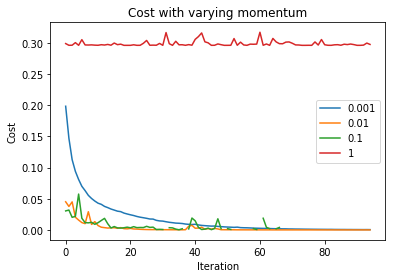

In [77]:
plots = [plt.plot(x[6:])[0] for x in costPlots]
plt.legend(plots, [str(x) for x in alphas])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost with varying momentum")
plt.show()
plt.close()

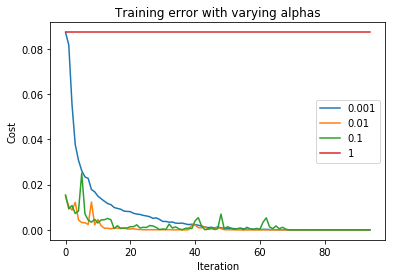

In [78]:
plots = [plt.plot(x[6:])[0] for x in trainPlots]
plt.legend(plots, [str(x) for x in alphas])
plt.title("Training error with varying alphas")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()
plt.close()

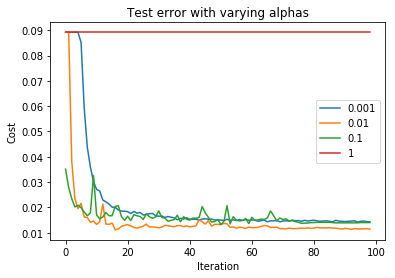

In [82]:
plots = [plt.plot(x[2:])[0] for x in testPlots]
plt.legend(plots, [str(x) for x in alphas])
plt.title("Test error with varying alphas")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()
plt.close()

Of course, a too-high choice of alpha gets us stuck from the very start and the gradient descent does not really move cost from there. Like we could have expected, a higher choice of alpha (0.1) gets us a sharper initial decrease in cost, but a smaller choice of alpha helps us break through later saddlepoints and minima more quickly. Our use of momentum probalby helps us in this as well. Interestingly, this is the only hyperparameter in which the recommended parameters did not perform best.